In [414]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)
# Shows top five rows of dataframe
df1.head(5)

Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [344]:
#count of total number of missing values in the DataFrame
df1.isnull().sum().sum()

0

In [345]:
# Total count of data points
len(df1)

1470

In [346]:
# Returns total number of rows and columns of a dataframe
rows, columns = df1.shape
rows, columns

(1470, 35)

In [347]:
# Shows concise summary of dataframe and data columns associated with their types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [348]:
# Prints specific type of an object
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [349]:
#shows quick statistic summary of data
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


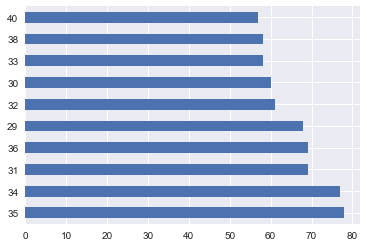

In [350]:
# 10 most popular age people working in company
df1['Age'].value_counts()[:10].plot(kind='barh')

In [351]:
# Finding the average age of the people working in company
df1['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

          Young_adults Mid_age_adults Mid_to_old_adults Old_adults
                 count          count             count      count
Attrition                                                         
No                  59            761               355         58
Yes                 38            147                41         11


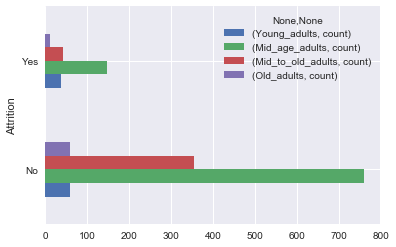

In [352]:
g1 = df1[(df1.Age >=15) & (df1.Age <=24)].groupby('Attrition').agg({'Age': ['count']})
d1 = g1.rename(columns={"Age": "Young_adults"})
g2 = df1[(df1.Age >=25) & (df1.Age <=40)].groupby('Attrition').agg({'Age': ['count']})
d2 = g2.rename(columns={"Age": "Mid_age_adults"})
g3 = df1[(df1.Age >=41) & (df1.Age <=54)].groupby('Attrition').agg({'Age': ['count']})
d3 = g3.rename(columns={"Age": "Mid_to_old_adults"})
g4 = df1[(df1.Age >=55) & (df1.Age <=64)].groupby('Attrition').agg({'Age': ['count']})
d4 = g4.rename(columns={"Age": "Old_adults"})
frames = [d1, d2, d3, d4]
res = pd.concat(frames, axis=1)
res.plot(kind='barh')
print(res)

          Divorced Married Single
             count   count  count
Attrition                        
No             294     589    350
Yes             33      84    120


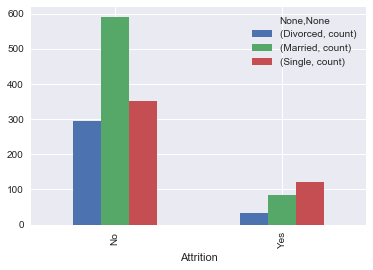

In [353]:
g1 = df1[(df1.MaritalStatus =='Divorced')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d1 = g1.rename(columns={"MaritalStatus": "Divorced"})
g2 = df1[(df1.MaritalStatus =='Married')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d2 = g2.rename(columns={"MaritalStatus": "Married"})
g3 = df1[(df1.MaritalStatus =='Single')].groupby('Attrition').agg({'MaritalStatus': ['count']})
d3 = g3.rename(columns={"MaritalStatus": "Single"})
frames = [d1, d2, d3]
res = pd.concat(frames, axis=1)
res.plot(kind='bar')
print(res)

In [406]:
# count of employee leaving the company group by same years in current role
df1[(df1.Attrition =='Yes')].groupby('YearsInCurrentRole').agg({'Attrition': ['count']})

,Attrition
,count
YearsInCurrentRole,
0,73
1,11
2,68
3,16
4,15
5,1
6,2
7,31


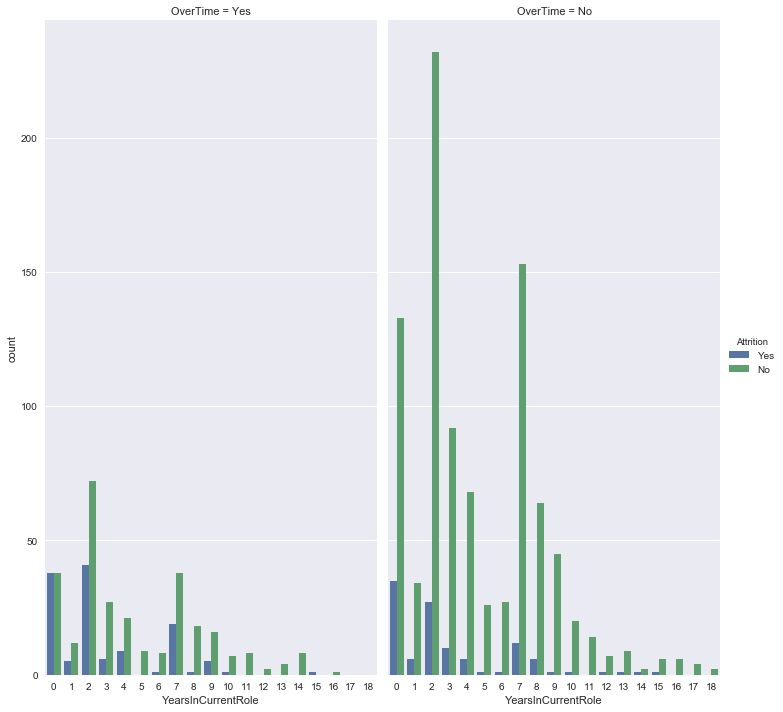

In [383]:
sns.factorplot(x="YearsInCurrentRole", hue="Attrition", col="OverTime", data=df1, kind="count",size=10, aspect=.5)

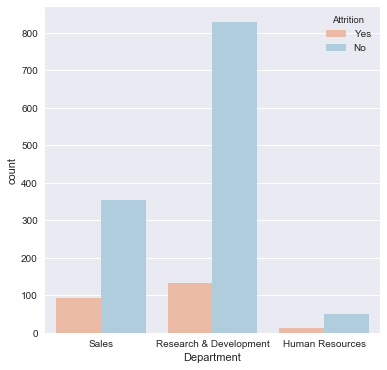

In [409]:
plt.figure(figsize=(6,6))
sns.countplot(x='Department', hue='Attrition', data=df1, palette='RdBu')

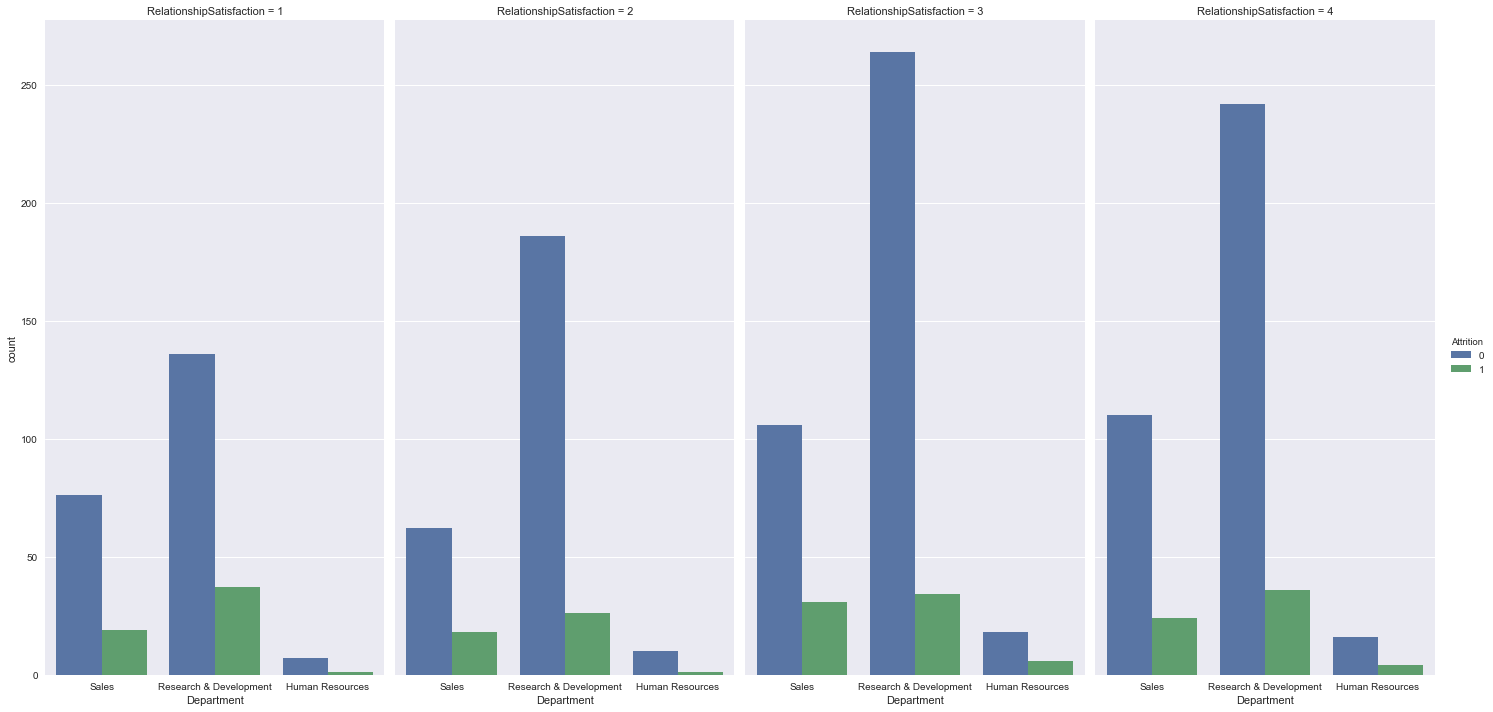

In [432]:
sns.factorplot(x="Department", hue="Attrition", col="RelationshipSatisfaction", data=df1, kind="count",size=10, aspect=.5)

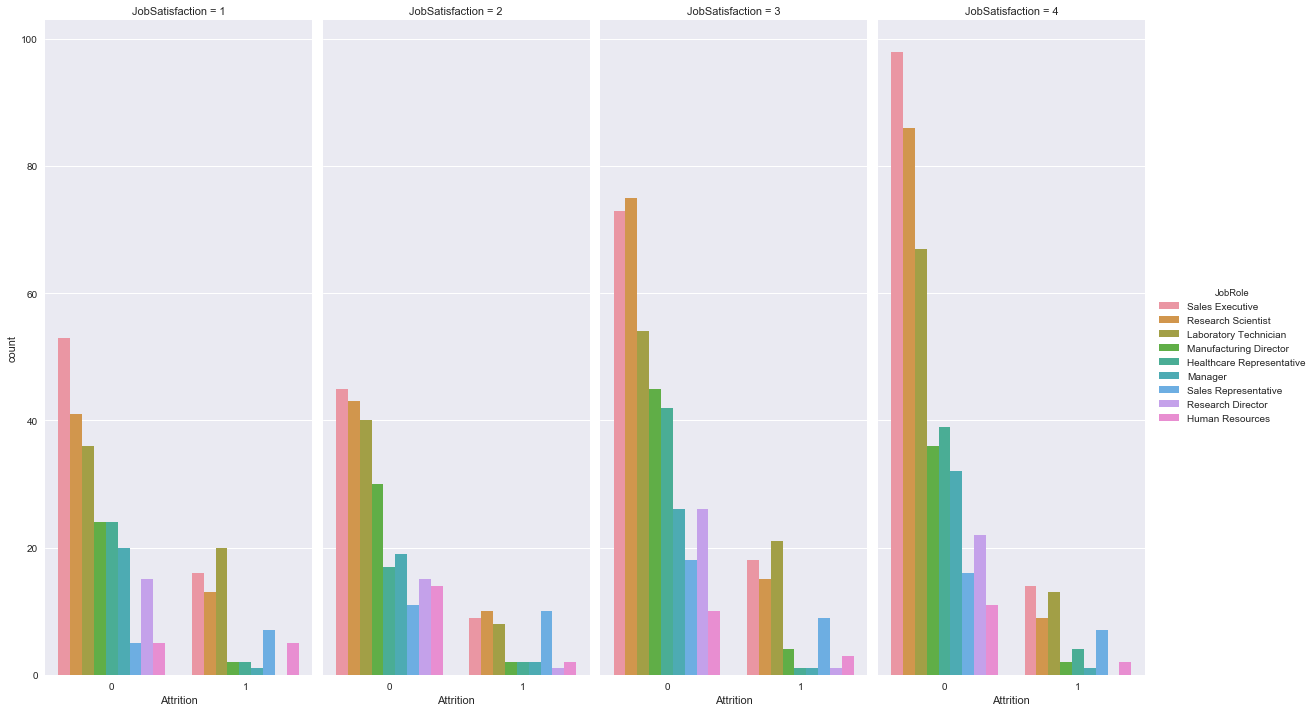

In [439]:
sns.factorplot(x="Attrition", hue="JobRole", col="JobSatisfaction", data=df1, kind="count",size=10, aspect=.4)